In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [18]:
data = pd.read_csv('./Dataset/process_data.csv')

In [19]:
data.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMnt,TotalCampaignsAcc,In_relationship
0,84835.0,189,104,379,111,189,218,1190,1,0
1,57091.0,464,5,64,7,0,37,577,2,0
2,67267.0,134,11,59,15,2,30,251,0,1
3,32474.0,10,0,1,0,0,0,11,0,1
4,21474.0,6,16,24,11,0,34,91,2,0


# K-Means Clustering

## Standardising data
- K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use standard scaling .

In [20]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'TotalMnt', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,TotalMnt,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,1.433975e-16,2.577933e-17,6.525392e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.411201e+00,-1.001801e+00,-1.347625e+00
25%,-7.925419e-01,-8.948111e-01,-1.347625e+00
50%,-1.523148e-02,-3.481617e-01,7.420464e-01
75%,8.012564e-01,7.351070e-01,7.420464e-01
max,3.006127e+00,3.145714e+00,7.420464e-01


the standard deviation is almost 1. All the data points were replaced by their z-scores.

## Principal Component Analysis (PCA)
- PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

## Elbow method
- The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [22]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

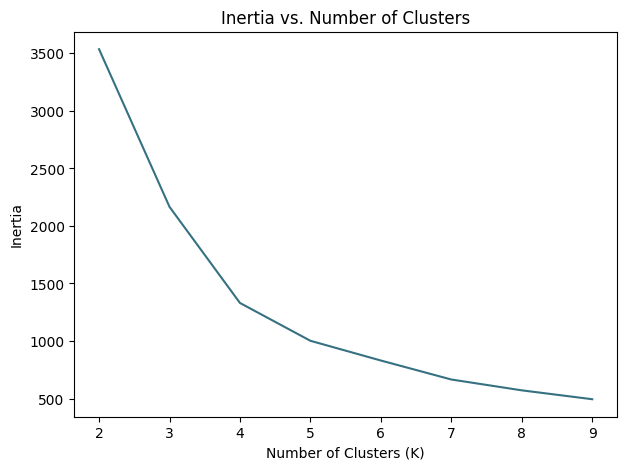

In [23]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

### Silhouette score analysis
- Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

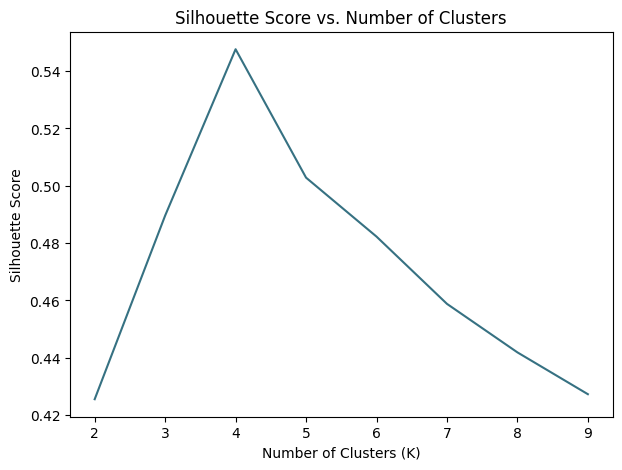

In [24]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [25]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

c:\Users\thota\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Exploration of Clusters
- In this section:

    - Visualisation of clusters
    - Mean consumption of different product types by cluster
    - Cluster sizes
    - Income by cluster
    - In_relationship feature by cluster

### Visualisation of clusters

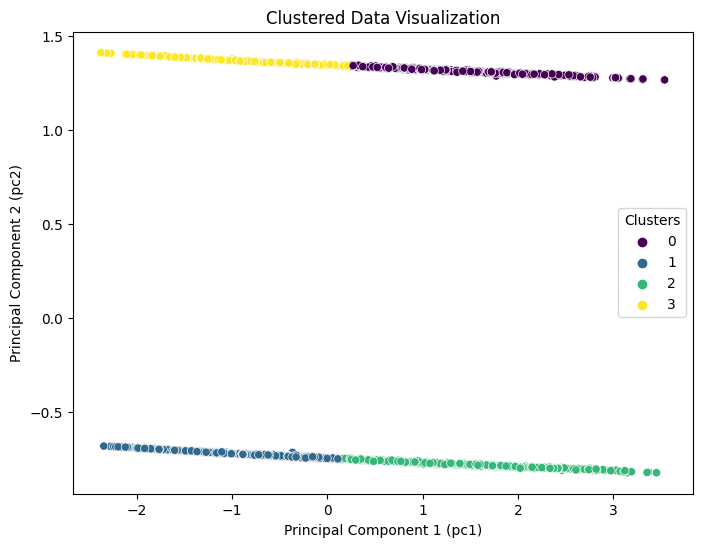

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [27]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,TotalMnt,In_relationship
Cluster,,,
0,71768.951807,1226.987952,0.0
1,37358.539110,168.646209,1.0
2,71212.285956,1197.620981,1.0
3,37204.920177,170.973392,0.0


Mean consumption of different product types by cluster

In [29]:
cols_mnt = ['TotalMnt','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,TotalMnt,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1226.987952,610.680723,54.340361,355.243976,77.000000,54.951807,74.771084
1,1,168.646209,84.090253,7.034898,37.231047,10.904934,7.244284,22.140794
2,2,1197.620981,613.099831,51.675127,332.544839,73.749577,53.773266,72.778342
3,3,170.973392,82.778271,7.827051,37.758315,10.807095,7.552106,24.250554


C:\Users\thota\AppData\Local\Temp\ipykernel_27376\713227271.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


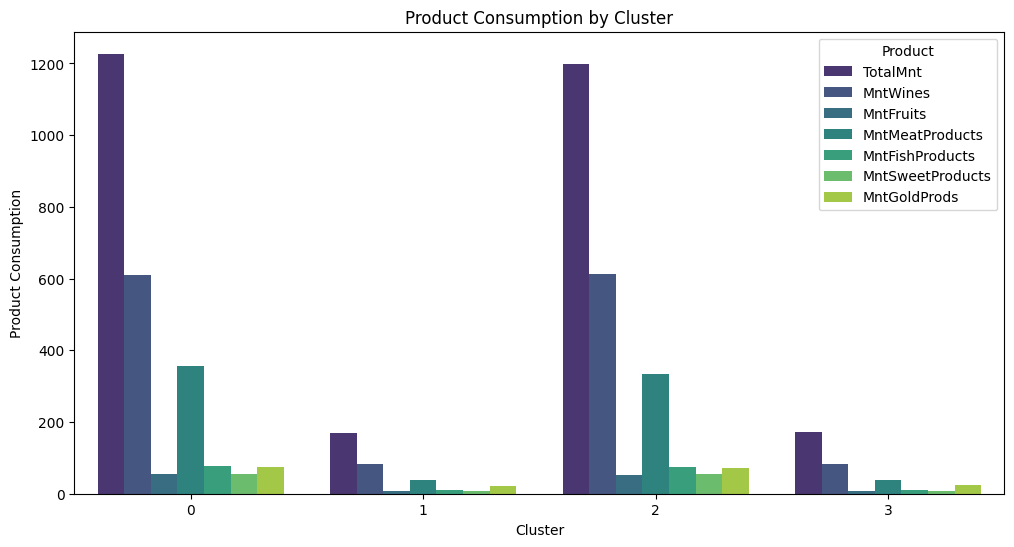

In [30]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

### Cluster sizes

Text(0, 0.5, 'TotalMnt')

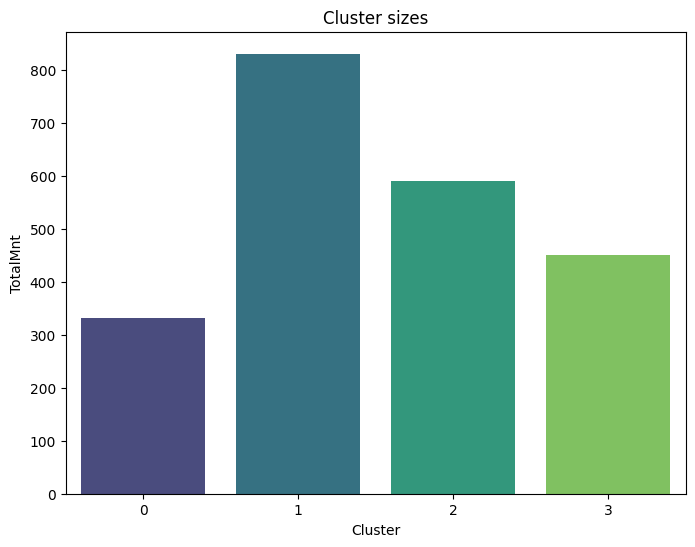

In [32]:
cluster_sizes = data.groupby('Cluster')[['TotalMnt']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='TotalMnt', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('TotalMnt')

In [34]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['TotalMnt'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,TotalMnt,Share%
0,0,332,15.0
1,1,831,38.0
2,2,591,27.0
3,3,451,20.0


### Income by cluster

Box plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


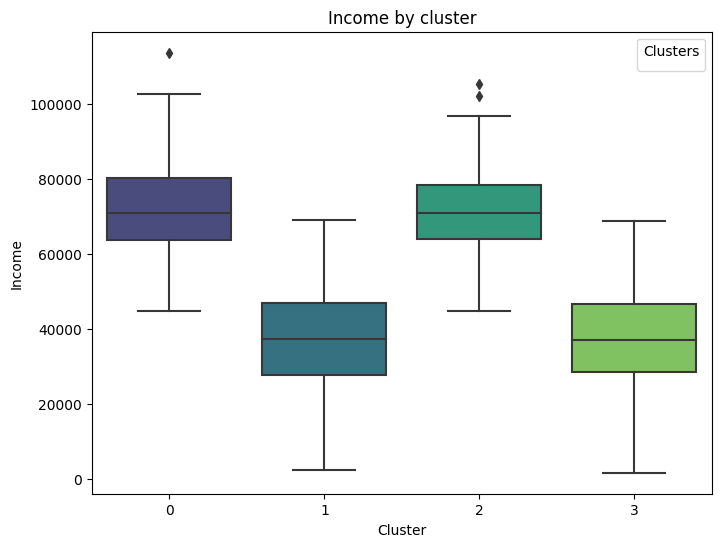

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

### Scatter Plot 

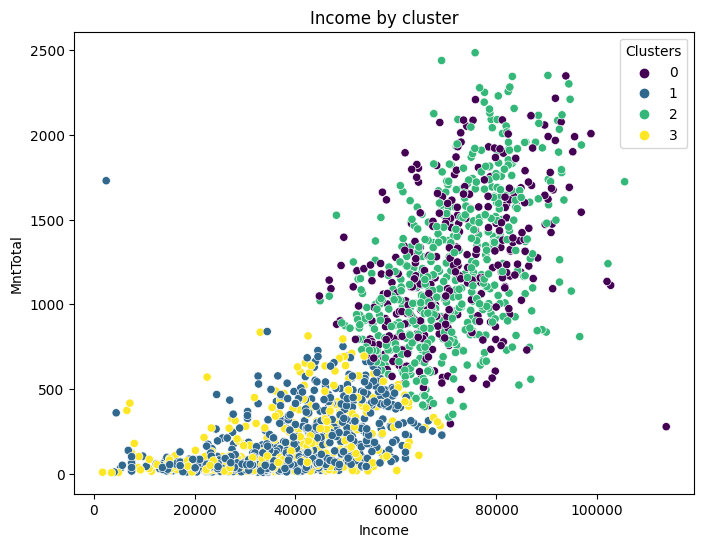

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='TotalMnt', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

### In_relationship feature by cluster

Text(0, 0.5, 'In_relationship')

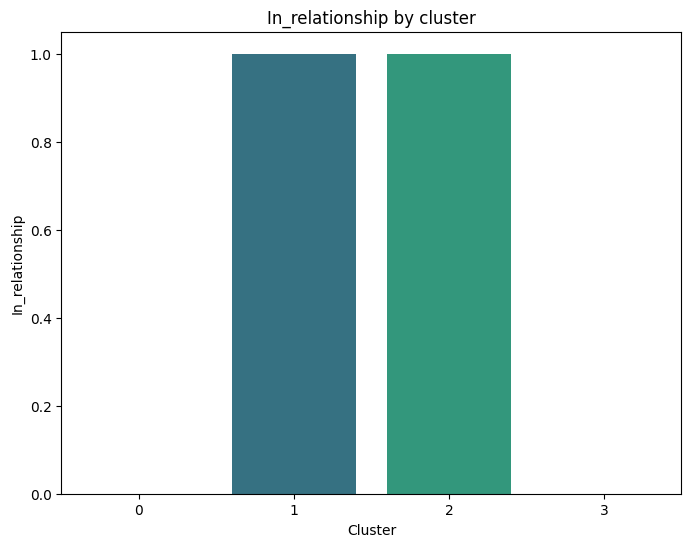

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

## Results

This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

### Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

### Cluster Characteristics

Cluster 0: High value customers in relationship (either married or together)
- This cluster represents 26% of the customer base
- These customers have high income and they are in a relationship

Cluster 1: Low value single customers
- This cluster represents 21% of the customer base
- These customers have low income and they are single

Cluster 2: High value single customers
- This cluster represents 15% of the customer base
- These customers have high income and they are single

Cluster 3: Low value customers in relationship
- This cluster represents 39% of the customer base
-These customers have low income and they are in a relationship

### Recommendations
Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

### Marketing Strategies for Each Cluster

Cluster 0: High value customers in relationship (either married or together)
- Preliminary analysis showed that high income customers buy more wines and fruits.
- A tailored campaign to promote high quality wines may bring good results.
- This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.

Cluster 1: Low value single customers
- Promos with discounts and coupons may bring good results for this targeted group.
- Loyalty program may stimulate these customers to purchase more often.

Cluster 2: High value single customers
- Similar to the Cluster 0, these customers buy a lot of wines and fruits.
- This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers

Cluster 3: Low value customers in relationship
- This cluster has the highest percentage of our customers (39%).
- Family offers and discounts may influence these customers to make more purchases

### Opportunities for the further analysis
- Further exploration on how children influence on the consumed products
- Further analysis on the influence of education
- analysis of frequent buyers
- Analysis of sales channels, e.g. store, website, etc.
- Analysis of the response to the marketing campaigns
- It would be great to add gender data to the dataset
- Test different clustering algorithms

### Thank you!